In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [4]:
df = pd.read_csv("insurance.csv")

In [5]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [8]:
df.shape

(1338, 7)

In [9]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [11]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


**EDA**


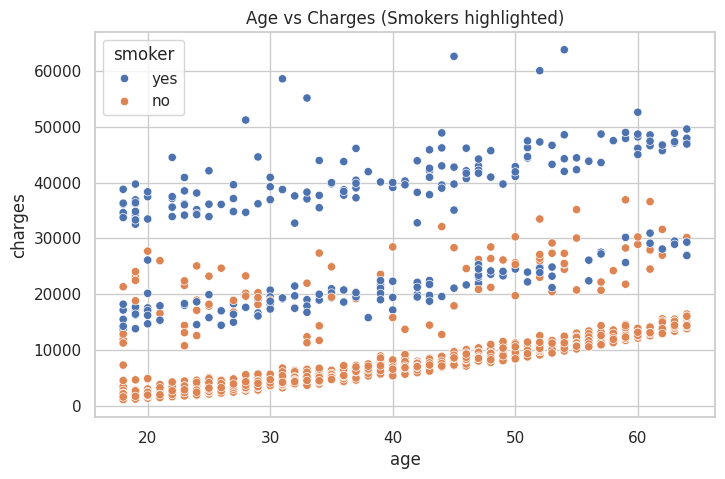

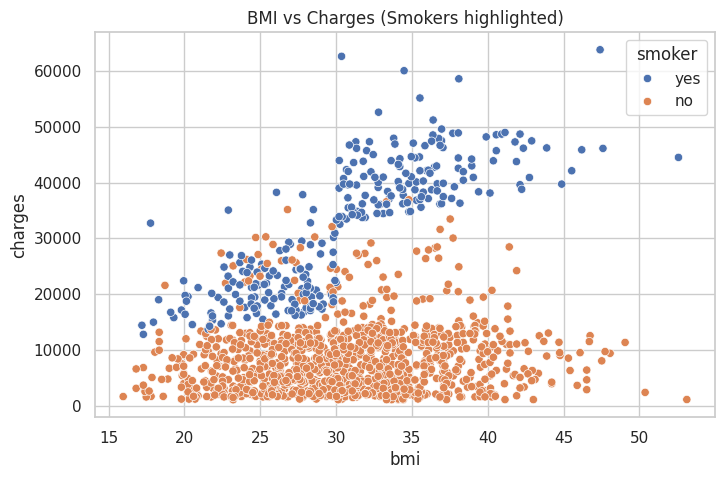

In [15]:
sns.set(style="whitegrid")
# age vs charges
plt.figure(figsize=(8,5))
sns.scatterplot(data = df, x='age', y = 'charges', hue = 'smoker')
plt.title('Age vs Charges (Smokers highlighted)')
plt.show()

# BMI vs Charges
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='bmi', y='charges', hue='smoker')
plt.title('BMI vs Charges (Smokers highlighted)')
plt.show()



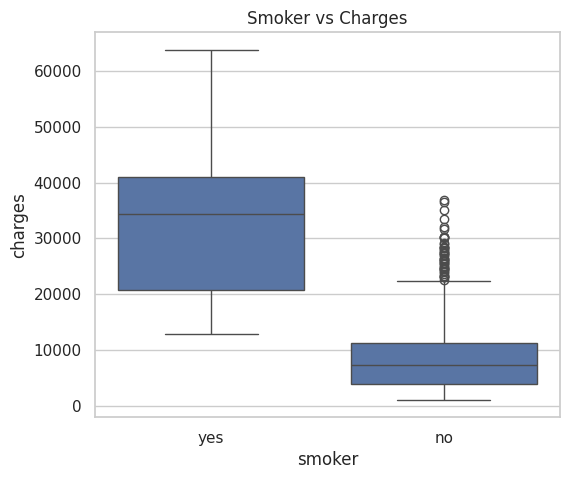

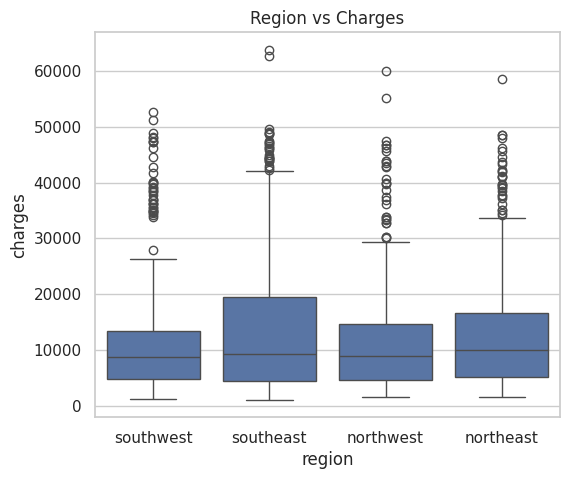

In [16]:
# Boxplot of Charges by Smoking Status
plt.figure(figsize=(6, 5))
sns.boxplot(data=df, x='smoker', y='charges')
plt.title('Smoker vs Charges')
plt.show()

# Boxplot of Charges by Region
plt.figure(figsize=(6, 5))
sns.boxplot(data=df, x='region', y='charges')
plt.title('Region vs Charges')
plt.show()

In [17]:
# one-hot encoding
df_encoded = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)

df_encoded.head()


,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


In [20]:
X = df_encoded.drop('charges', axis = 1)
y = df_encoded['charges']


In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# age, bmi, children scaled
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[['age', 'bmi', 'children']] = scaler.fit_transform(X_train[['age', 'bmi', 'children']])
X_test_scaled[['age', 'bmi', 'children']] = scaler.transform(X_test[['age', 'bmi', 'children']])

In [23]:
X_train_scaled.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
560,0.472227,-1.756525,0.734336,False,False,True,False,False
1285,0.543313,-1.033082,-0.911192,False,False,False,False,False
1142,0.898745,-0.943687,-0.911192,False,False,False,True,False
969,-0.025379,0.622393,3.202629,False,False,False,True,False
486,1.040918,-1.504893,1.557100,False,False,True,False,False


In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Initialize model
lr_model =  LinearRegression()

# Train the model
lr_model.fit(X_train_scaled, y_train)

# Predict on test data
y_pred = lr_model.predict(X_test_scaled)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R2 Score: {r2}")



MSE: 33596915.85136148
RMSE: 5796.284659276275
MAE: 4181.194473753652
R2 Score: 0.7835929767120722


In [26]:
from sklearn.tree import DecisionTreeRegressor

# Initialize and train
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train_scaled, y_train)

# Predict on test set
y_pred_dt = dt_model.predict(X_test_scaled)

# Evaluate
mae_dt = mean_absolute_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
r2_dt = r2_score(y_test, y_pred_dt)

print(f"Decision Tree MAE  : {mae_dt:.2f}")
print(f"Decision Tree RMSE : {rmse_dt:.2f}")
print(f"Decision Tree R²   : {r2_dt:.4f}")

Decision Tree MAE  : 3114.15
Decision Tree RMSE : 6387.12
Decision Tree R²   : 0.7372


In [27]:
from sklearn.model_selection import GridSearchCV
# Define parameter grid
param_grid = {
    'max_depth': [3, 5, 7, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
# Initialize model
dt = DecisionTreeRegressor(random_state=42)

# Setup GridSearchCV
grid_search = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    cv=3,                 # 3-fold cross-validation
    n_jobs=-1,            # Use all cores
    scoring='r2',
    verbose=1
)

# Fit to training data
grid_search.fit(X_train_scaled, y_train)

# Best model
best_dt = grid_search.best_estimator_

# Predict
y_pred_best_dt = best_dt.predict(X_test_scaled)

# Evaluate
mae_best = mean_absolute_error(y_test, y_pred_best_dt)
rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_best_dt))
r2_best = r2_score(y_test, y_pred_best_dt)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Tuned Decision Tree MAE  : {mae_best:.2f}")
print(f"Tuned Decision Tree RMSE : {rmse_best:.2f}")
print(f"Tuned Decision Tree R²   : {r2_best:.4f}")

Fitting 3 folds for each of 45 candidates, totalling 135 fits
Best parameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Tuned Decision Tree MAE  : 2865.64
Tuned Decision Tree RMSE : 4776.26
Tuned Decision Tree R²   : 0.8531


In [28]:
from sklearn.ensemble import RandomForestRegressor

# Initialize
rf_model = RandomForestRegressor(random_state=42)

# Train
rf_model.fit(X_train_scaled, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest MAE  : {mae_rf:.2f}")
print(f"Random Forest RMSE : {rmse_rf:.2f}")
print(f"Random Forest R²   : {r2_rf:.4f}")

Random Forest MAE  : 2543.98
Random Forest RMSE : 4567.78
Random Forest R²   : 0.8656


In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Parameter grid
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [10, 15, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Base model
rf = RandomForestRegressor(random_state=42)

# GridSearchCV
grid_search_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=3,               # 3-fold cross-validation
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

# Fit on training data
grid_search_rf.fit(X_train_scaled, y_train)

# Best model
best_rf = grid_search_rf.best_estimator_

# Predict and evaluate
y_pred_best_rf = best_rf.predict(X_test_scaled)

mae_best_rf = mean_absolute_error(y_test, y_pred_best_rf)
rmse_best_rf = np.sqrt(mean_squared_error(y_test, y_pred_best_rf))
r2_best_rf = r2_score(y_test, y_pred_best_rf)

# Output
print(f"Best parameters: {grid_search_rf.best_params_}")
print(f"Final Tuned RF MAE  : {mae_best_rf:.2f}")
print(f"Final Tuned RF RMSE : {rmse_best_rf:.2f}")
print(f"Final Tuned RF R²   : {r2_best_rf:.4f}")

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best parameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Final Tuned RF MAE  : 2472.03
Final Tuned RF RMSE : 4409.14
Final Tuned RF R²   : 0.8748
